In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



In [2]:
# чтение данных
df = pd.read_csv('C:/Program Files/Python37/1/CSV/sber_statya/sber_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Program Files/Python37/1/CSV/sber_statya/sber_train.csv'

In [3]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

# Процентный список пропущенных данных


In [ ]:
cols = df.columns[:]

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# Гистограмма пропущенных данных

Еще одна хорошая техника визуализации для наборов с большим количеством признаков – построение
гистограммы для числа отсутствующих значений в записи. 

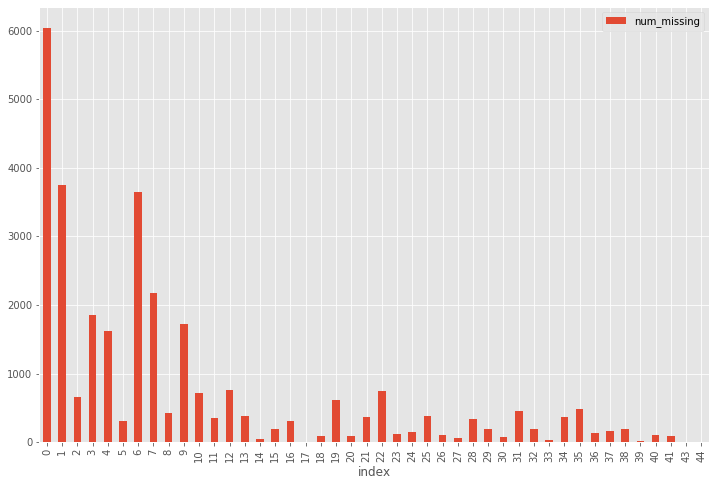

In [22]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [32]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

# Отбрасывание признаков

Как и предыдущая техника, отбрасывание признаков может применяться только для неинформативных признаков.
В процентном списке, построенном ранее, мы увидели, что признак hospital_beds_raion
имеет высокий процент недостающих значений – 47%. Мы можем полностью отказаться от этого признака:

In [ ]:
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

# Внесение недостающих значений

Для численных признаков можно воспользоваться методом принудительного заполнения пропусков.
Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных записей.
Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.

Одну и ту же стратегию принудительного заполнения можно применить сразу для всех числовых признаков:

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        med = df[col].median()
        df[col] = df[col].fillna(med)

К счастью, в нашем наборе не нашлось пропусков в категориальных признаках. Но это не мешает нам продемонстрировать использование той же стратегии:

In [ ]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

# Неинформативные признаки

Составим список признаков, у которых более 95% строк содержат одно и то же значение.

In [ ]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

# Дубликаты записей

Способ обнаружения дубликатов зависит от того, что именно мы считаем дубликатами. Например, в наборе данных есть уникальный идентификатор id. Если две записи имеют одинаковый id, мы считаем, что это одна и та же запись. Удалим все неуникальные записи:

In [ ]:
# отбрасываем неуникальные строки
df_dedupped = df.drop('id', axis=1).drop_duplicates()

Другой распространенный способ вычисления дубликатов: по набору ключевых признаков. Например, неуникальными можно считать записи с одной и той же площадью жилья, ценой и годом постройки. 
Найдем в нашем наборе дубликаты по группе критических признаков – full_sq, life_sq, floor, build_year, num_room, price_doc:

In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

Вот так выглядит удаление дубликатов, основанное на наборе ключевых признаков:

In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

# Разные регистры символов

Эта проблема легко решается принудительным изменением регистра:

In [4]:
# пусть все будет в нижнем регистре
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

# Разные форматы данных

Ряд данных в наборе находится не в том формате, с которым нам было бы удобно работать. Например, даты, записанные в виде строки, следует преобразовать в формат DateTime.

Признак timestamp представляет собой строку, хотя является датой:

Чтобы было проще анализировать транзакции по годам и месяцам, значения признака timestamp следует преобразовать в удобный формат:

In [6]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')

In [ ]:
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

# Адреса

In [9]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


Минимальное форматирование включает следующие операции:
приведение всех символов к нижнему регистру;
удаление пробелов в начале и конце строки;
удаление точек;
стандартизация формулировок: замена street на st, apartment на apt и т. д.